<a href="https://colab.research.google.com/github/duc-ke/study-book-keras_with_blocks/blob/master/2_MLP_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# indians + diabetes dataset
* 8 variables
* binary classification

In [0]:
!git clone https://github.com/duc-ke/study-keras-deeplearning.git
%run study-keras-deeplearning/3분딥러닝케라스맛/0_custom_libraries.ipynb

fatal: destination path 'study-keras-deeplearning' already exists and is not an empty directory.


Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np

In [0]:
# to see only parameters effect,
np.random.seed(5)

In [0]:
!wget http://nrvis.com/data/mldata/pima-indians-diabetes.csv
pd.read_csv('pima-indians-diabetes.csv')

--2020-03-01 09:47:11--  http://nrvis.com/data/mldata/pima-indians-diabetes.csv
Resolving nrvis.com (nrvis.com)... 173.236.156.25
Connecting to nrvis.com (nrvis.com)|173.236.156.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/csv]
Saving to: ‘pima-indians-diabetes.csv.2’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.03s   

2020-03-01 09:47:12 (878 KB/s) - ‘pima-indians-diabetes.csv.2’ saved [23279/23279]



,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [0]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
print(dataset.shape)
print(dataset)

(768, 9)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [0]:
x_train = dataset[:700, :8]
y_train = dataset[:700, 8]
x_test = dataset[700:, :8]
y_test = dataset[700:, 8]

### DNN modeling

In [0]:
from keras.layers import Dense
from keras.models import Sequential

In [0]:
class DNN(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Dense(12, activation='relu', input_shape=(8,)))
    self.add(Dense(8, activation='relu'))
    self.add(Dense(1, activation='sigmoid'))
    
    self.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])

In [0]:
model = DNN()

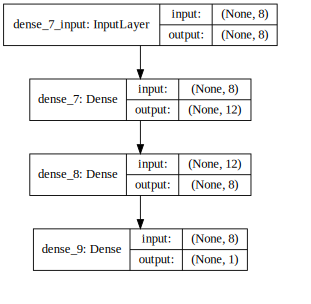

In [0]:
visualize_model(model)

In [0]:
histroy = model.fit(x_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
700/700 [==============================] - 0s 387us/step - loss: 3.7910 - acc: 0.5029
Epoch 2/1000
700/700 [==============================] - 0s 55us/step - loss: 2.8905 - acc: 0.4943
Epoch 3/1000
700/700 [==============================] - 0s 60us/step - loss: 2.5235 - acc: 0.5371
Epoch 4/1000
700/700 [==============================] - 0s 67us/step - loss: 2.2090 - acc: 0.5229
Epoch 5/1000
700/700 [==============================] - 0s 66us/step - loss: 1.9991 - acc: 0.5314
Epoch 6/1000
700/700 [==============================] - 0s 66us/step - loss: 1.7196 - acc: 0.5514
Epoch 7/1000
700/700 [==============================] - 0s 68us/step - loss: 1.5059 - acc: 0.5671
Epoch 8/1000
700/700 [==============================] - 0s 77us/step - loss: 1.3958 - acc: 0.5657
Epoch 9/1000
700/700 [==============================] - 0s 74us/step - loss: 1.3086 - acc: 0.5843
Epoch 10/1000
700/700 [==============================] - 0s 84us/step - loss: 1.2509 - acc: 0.5786
Epoch 11/1000
700/

In [0]:
evaluation = model.evaluate(x_test, y_test, batch_size=64)
print(evaluation)

68/68 [==============================] - 0s 879us/step
[0.5922049546942991, 0.7794117647058824]


### show performance

In [0]:
import matplotlib.pyplot as plt

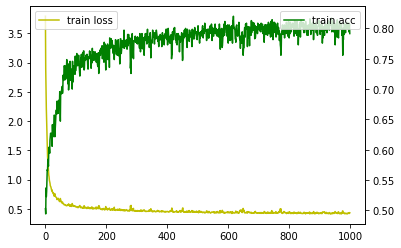

In [0]:
fig, ax_loss = plt.subplots()
ax_acc = ax_loss.twinx()
ax_loss.plot(histroy.history['loss'], 'y', label='train loss')
ax_acc.plot(histroy.history['acc'], 'g', label='train acc')

ax_loss.legend(loc='upper left')
ax_acc.legend(loc='upper right')